In [143]:
#!/usr/bin/env python3

# import libraries and dependencies
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier, RidgeClassifier, Lasso, LassoCV, ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

# For confusion matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# (OPTION) Load dataset direct from sklearn
from sklearn.datasets import load_breast_cancer

dataset=load_breast_cancer()

df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Regression-Algorithms-Analysis-Project/main/data.csv")


In [144]:
# X are the factors that caused the breast cancer/tumor
X=df.iloc[:,2:31].values
# Y is a categorical variable that shows whether the tumor is benign (safe), or malicious (cancer)
Y=df.iloc[:,1].values

# Encode categorical data (Y here) to 0 and 1 using label encoder
labelEncoder_Y=LabelEncoder()
Y=labelEncoder_Y.fit_transform(Y)

# 80(training)-10(valdiation)-10(test) split of the training and testing data

# Split data into 2: 80% train, 20% hold (validation, test)
X_train, X_hold, Y_train, Y_hold = train_test_split(X, Y, test_size=0.2, random_state=0)

# Split the hold into validation and test (10% each)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_hold, Y_hold, test_size=0.5, random_state=0)

# Standardize the features using StandardScaler for all 3 models (training, valdiation, testing)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_valid=sc.fit_transform(X_valid)
X_test=sc.fit_transform(X_test)



In [145]:
# Baseline 1
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Step 1: Data Preprocessing - StandardScaler
    ('clf', LinearRegression())    # Step 2: Classification Model - Logistic Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Evaluate the pipeline on the testing data
accuracy = pipeline.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.680094584881508


In [146]:
# Baseline 2
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Step 1: Data Preprocessing - StandardScaler
    ('clf', LogisticRegression())    # Step 2: Classification Model - Logistic Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Evaluate the pipeline on the testing data
accuracy = pipeline.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


For Approach 1 (LASSO Regression): 
Best Hyperparameters: {'clf__C': 1, 'clf__max_iter': 1000, 'clf__tol': 0.01}

Accuracy before tuning: 0.8947368421052632
Accuracy after tuning: 0.9649122807017544
Percentage of improvement: 7.02 %


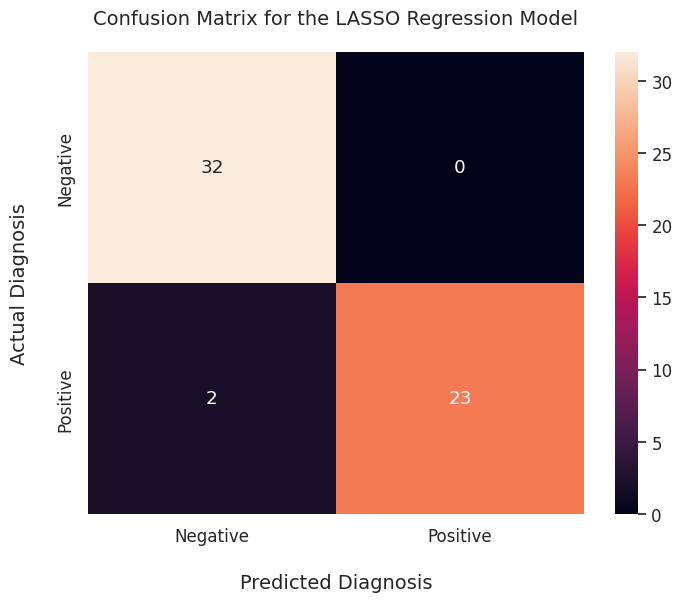

In [147]:
# Approach 1 (LASSO Regression)

from sklearn.pipeline import Pipeline

# Define the pipeline with standard scaler as data preprocessing, lasso regerssion for model
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l1',solver='liblinear'))
])

# Predictions before tuning
y_pred_before_tuning = lasso_pipeline.fit(X_valid, Y_valid).predict(X_test)
accuracy_before_tuning = accuracy_score(Y_test, y_pred_before_tuning)

# Define hyperparameters for tuning
parameters = {
    'clf__C': [0.1, 1, 10, 100],    # Regularization parameter
    'clf__max_iter': [100, 500, 1000], # itertion parameter
    'clf__tol': [1e-4, 1e-3, 0.01, 0.1], # tolerance/ stopping parameter
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso_pipeline, parameters, cv=5, n_jobs = -1)
grid_search.fit(X_train, Y_train)

# Best hyperparameters found
best_params = grid_search.best_params_


# Predictions after tuning
y_pred_after_tuning = grid_search.predict(X_test)
accuracy_after_tuning = accuracy_score(Y_test, y_pred_after_tuning)

# Print the results out:
print("For Approach 1 (LASSO Regression): ")
print("Best Hyperparameters:", best_params)
print("\nAccuracy before tuning:", accuracy_before_tuning)
print("Accuracy after tuning:", accuracy_after_tuning)
print('Percentage of improvement: {0:.2f} %'.format((accuracy_after_tuning-accuracy_before_tuning)*100))


#------------------------------------------------------------------
# Confusion Matrix display (LASSO Regression)
ridge_conf_matrix = confusion_matrix(Y_test, y_pred_after_tuning)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

# Display Confusion Matrix through Heatmap
ax = sns.heatmap(ridge_conf_matrix, annot=True, fmt='d', )
# set x-axis label and ticks.
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the LASSO Regression Model", fontsize=14, pad=20)
plt.show()
# plt.savefig("RidgeRegressionCM.jpg")



For Approach 2 (Ridge Regression): 
Best Hyperparameters: {'clf__alpha': 10, 'clf__max_iter': 1000, 'clf__solver': 'auto', 'clf__tol': 0.0001}

Accuracy before tuning: 0.8771929824561403
Accuracy after tuning: 0.9122807017543859
Percentage of improvement: 3.51 %


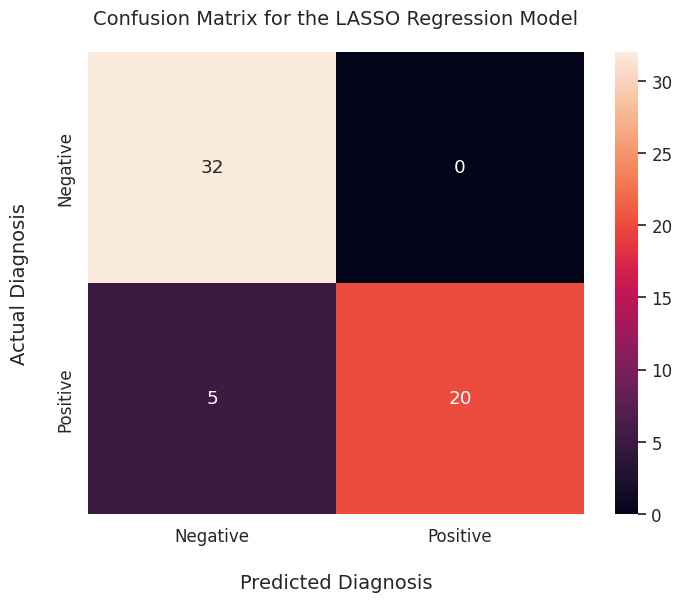

In [148]:
# Approach 2 (Ridge Regression)

from sklearn.pipeline import Pipeline

# Define the pipeline with standard scaler as data preprocessing, ridge regerssion for model
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RidgeClassifier())
])

# Predictions before tuning
y_pred_before_tuning = ridge_pipeline.fit(X_valid, Y_valid).predict(X_test)
accuracy_before_tuning = accuracy_score(Y_test, y_pred_before_tuning)

# Define hyperparameters for tuning
parameters = {
    'clf__alpha': [0.01, 0.05, 1, 5, 10, 100],  # More diverse range for alpha    # Regularization parameter
    'clf__max_iter': [ 1000, 5000, 10000, 50000], # itertion parameter
    'clf__tol': [1e-4, 1e-3, 0.01, 0.1, 0.5], # tolerance/ stopping parameter
    'clf__solver': ['auto', 'svd', 'cholesky'], # solver paraneter
}

# Perform GridSearchCV for hyperparameter tuning
r_grid_search = GridSearchCV(ridge_pipeline, parameters, cv=5)
r_grid_search.fit(X_train, Y_train)

# Best hyperparameters found
best_params = r_grid_search.best_params_


# Predictions after tuning
y_pred_after_tuning = r_grid_search.predict(X_test)
accuracy_after_tuning = accuracy_score(Y_test, y_pred_after_tuning)

# Print the results out:
print("For Approach 2 (Ridge Regression): ")
print("Best Hyperparameters:", best_params)
print("\nAccuracy before tuning:", accuracy_before_tuning)
print("Accuracy after tuning:", accuracy_after_tuning)
print('Percentage of improvement: {0:.2f} %'.format((accuracy_after_tuning-accuracy_before_tuning)*100))


#------------------------------------------------------------------
# Confusion Matrix display (Ridge Regression)
ridge_conf_matrix = confusion_matrix(Y_test, y_pred_after_tuning)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

# Display Confusion Matrix through Heatmap
ax = sns.heatmap(ridge_conf_matrix, annot=True, fmt='d', )
# set x-axis label and ticks.
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the LASSO Regression Model", fontsize=14, pad=20)
plt.show()
# plt.savefig("RidgeRegressionCM.jpg")



For Approach 3 (Elastic Net Regression): 
Best Hyperparameters: {'clf__alpha': 0.01, 'clf__max_iter': 1000, 'clf__tol': 0.01}

Accuracy before tuning: 0.9298245614035088
Accuracy after tuning: 0.9473684210526315
Percentage of improvement: 1.75 %


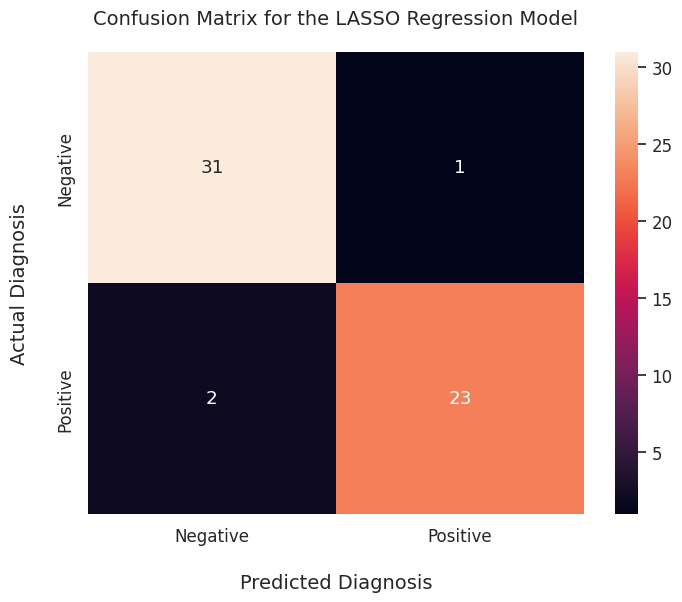

In [149]:
# Approach 3 (Elastic Net Regression)

from sklearn.pipeline import Pipeline

# Define the pipeline with standard scaler as data preprocessing, ridge regerssion for model
net_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(penalty='elasticnet', max_iter=1000))
])

# Predictions before tuning
y_pred_before_tuning = net_pipeline.fit(X_valid, Y_valid).predict(X_test)
accuracy_before_tuning = accuracy_score(Y_test, y_pred_before_tuning)

# Define hyperparameters for tuning
parameters = {
    'clf__alpha': [0.01, 0.05, 1, 5, 10, 100],  # More diverse range for alpha    # Regularization parameter
    'clf__max_iter': [ 1000, 5000, 10000, 50000], # itertion parameter
    'clf__tol': [1e-4, 1e-3, 0.01, 0.1, 0.5], # tolerance/ stopping parameter
    # 'clf__solver': ['auto', 'svd', 'cholesky'], # solver paraneter
}

# Perform GridSearchCV for hyperparameter tuning
net_grid_search = GridSearchCV(net_pipeline, parameters, cv=5)
net_grid_search.fit(X_train, Y_train)

# Best hyperparameters found
best_params = net_grid_search.best_params_

# Predictions after tuning
y_pred_after_tuning = net_grid_search.predict(X_test)
accuracy_after_tuning = accuracy_score(Y_test, y_pred_after_tuning)

# Print the results out:
print("For Approach 3 (Elastic Net Regression): ")
print("Best Hyperparameters:", best_params)
print("\nAccuracy before tuning:", accuracy_before_tuning)
print("Accuracy after tuning:", accuracy_after_tuning)
print('Percentage of improvement: {0:.2f} %'.format((accuracy_after_tuning-accuracy_before_tuning)*100))


#------------------------------------------------------------------
# Confusion Matrix display (Elastic Net Regression)
ridge_conf_matrix = confusion_matrix(Y_test, y_pred_after_tuning)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

# Display Confusion Matrix through Heatmap
ax = sns.heatmap(ridge_conf_matrix, annot=True, fmt='d', )
# set x-axis label and ticks.
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix for the LASSO Regression Model", fontsize=14, pad=20)
plt.show()
# plt.savefig("RidgeRegressionCM.jpg")

